<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/4_eda_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# connect to GitHub repo
GITHUB_USER = "pravallikai"
REPO_NAME = "Evolution-of-musical-trends-using-py"

# clone repo if missing
if not pathlib.Path(REPO_NAME).exists():
    !git clone https://github.com/{GITHUB_USER}/{REPO_NAME}.git

os.chdir(REPO_NAME)

# load cleaned data
df = pd.read_csv("data/processed/spotify_audio_features_1960_2019_clean.csv")

print("✅ Loaded clean dataset:", df.shape)
df.head()


Cloning into 'Evolution-of-musical-trends-using-py'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 115 (delta 41), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 4.89 MiB | 5.34 MiB/s, done.
Resolving deltas: 100% (41/41), done.
✅ Loaded clean dataset: (41106, 11)


,year,track,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,1960,Jealous Kind Of Fella,Garland Green,0.417,0.620,-7.727,0.0403,0.490,0.000000,0.845,185.655
1,1960,Initials B.B.,Serge Gainsbourg,0.498,0.505,-12.475,0.0337,0.018,0.107000,0.797,101.801
2,1960,Melody Twist,Lord Melody,0.657,0.649,-13.392,0.0380,0.846,0.000004,0.908,115.940
3,1960,Mi Bomba Sonó,Celia Cruz,0.590,0.545,-12.058,0.1040,0.706,0.024600,0.967,105.592
4,1960,Uravu Solla,P. Susheela,0.515,0.765,-3.515,0.1240,0.857,0.000872,0.906,114.617


In [2]:
df['year'] = df['year'].astype(int)
df['decade'] = (df['year'] // 10) * 10
print(df[['year','decade']].head())


   year  decade
0  1960    1960
1  1960    1960
2  1960    1960
3  1960    1960
4  1960    1960


In [3]:
features = ["danceability","energy","valence","tempo","loudness"]
decade_means = df.groupby('decade')[features].mean().round(3)
display(decade_means)

# save table
pathlib.Path("reports/figures").mkdir(parents=True, exist_ok=True)
decade_means.to_csv("reports/figures/decade_means.csv")
print("✅ Saved summary table.")


,danceability,energy,valence,tempo,loudness
decade,,,,,
1960,0.492,0.445,0.575,115.125,-12.030
1970,0.526,0.528,0.596,119.009,-11.734
1980,0.564,0.608,0.588,120.650,-11.042
1990,0.567,0.602,0.538,118.840,-10.235
2000,0.543,0.695,0.482,121.613,-7.449
2010,0.568,0.668,0.444,122.354,-7.590


✅ Saved summary table.


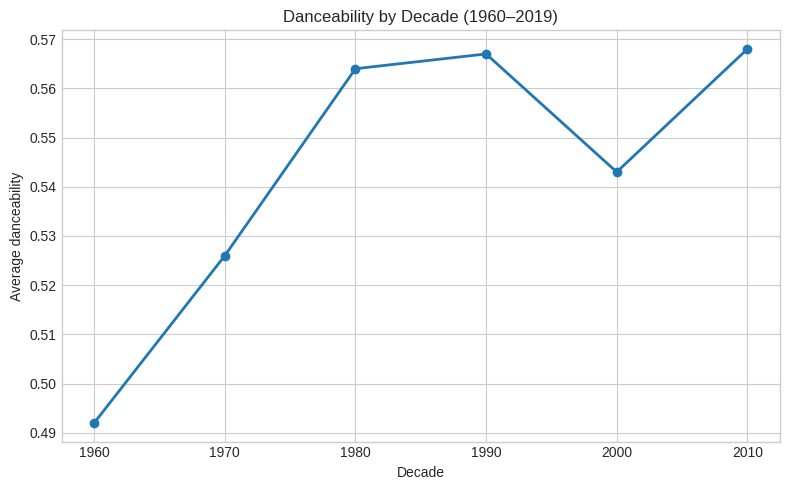

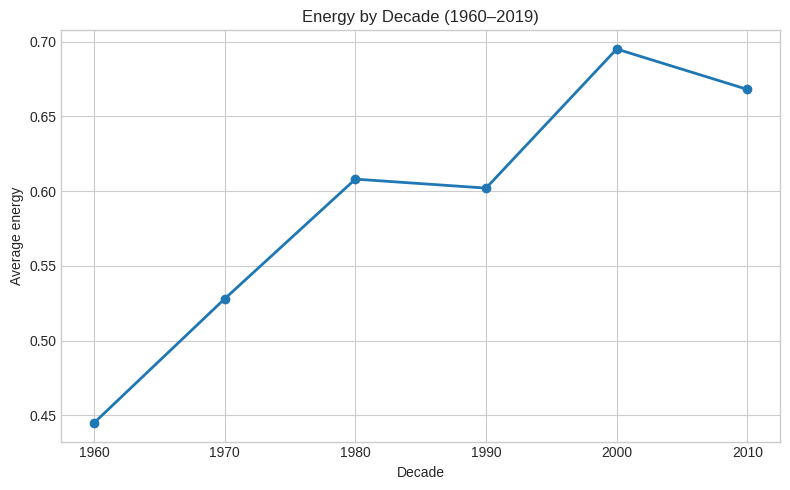

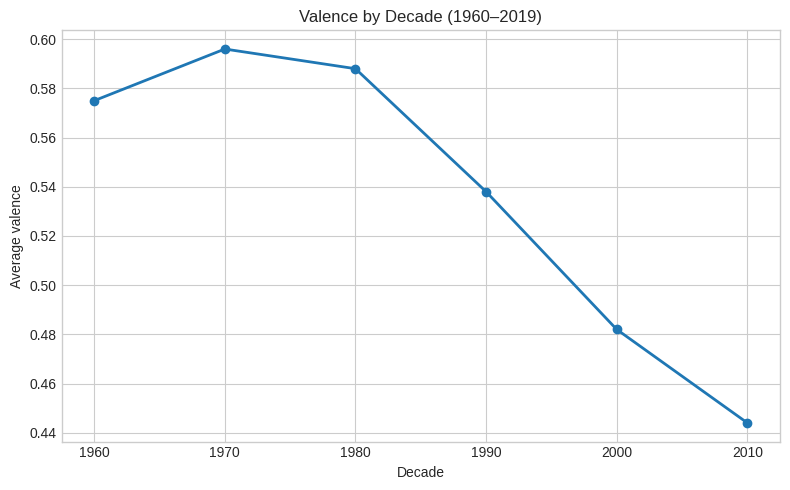

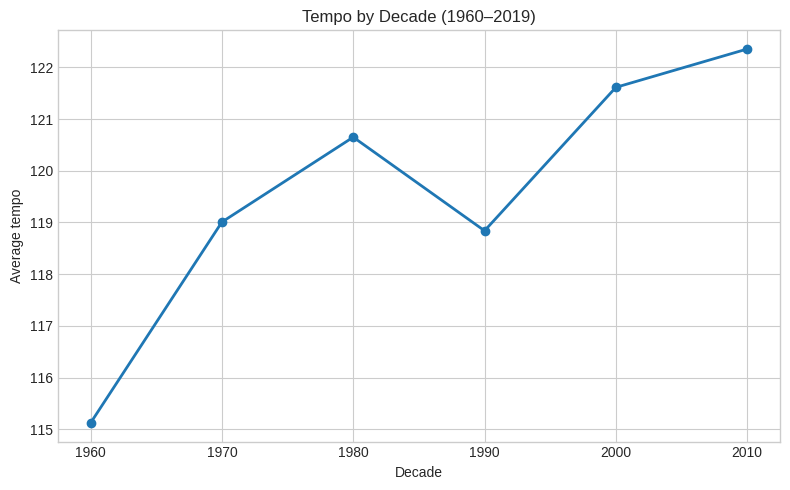

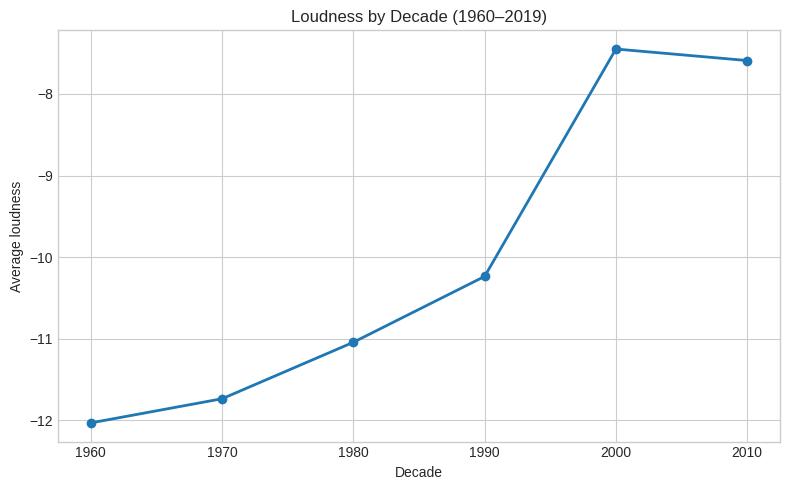

In [4]:
plt.style.use('seaborn-v0_8-whitegrid')

def plot_feature_trend(feature):
    plt.figure(figsize=(8,5))
    plt.plot(decade_means.index, decade_means[feature], marker='o', linewidth=2)
    plt.title(f"{feature.capitalize()} by Decade (1960–2019)")
    plt.xlabel("Decade")
    plt.ylabel(f"Average {feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"reports/figures/{feature}_trend.png", dpi=150)
    plt.show()

for f in features:
    plot_feature_trend(f)


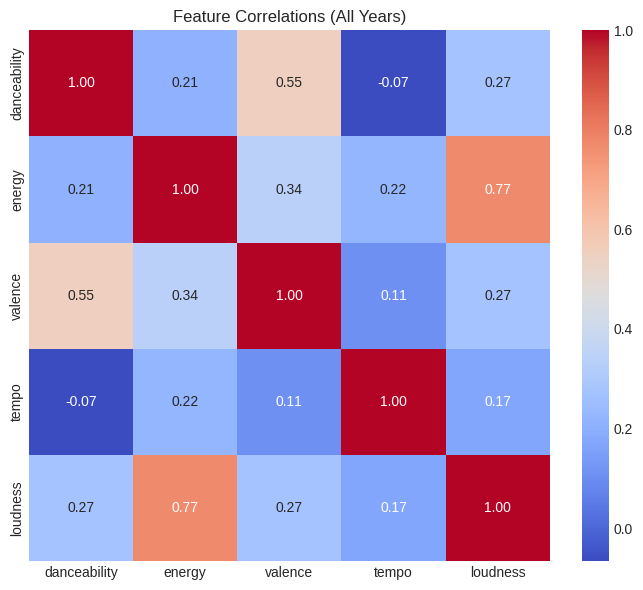

In [5]:
corr = df[features].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations (All Years)")
plt.tight_layout()
plt.savefig("reports/figures/correlation_heatmap.png", dpi=150)
plt.show()


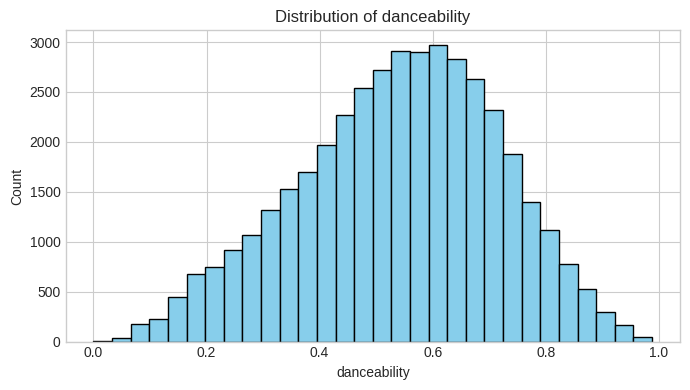

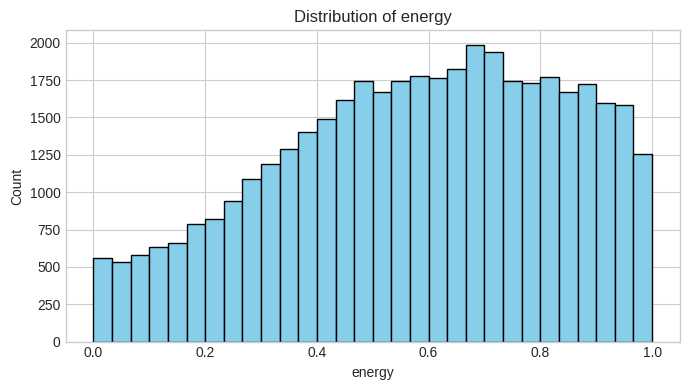

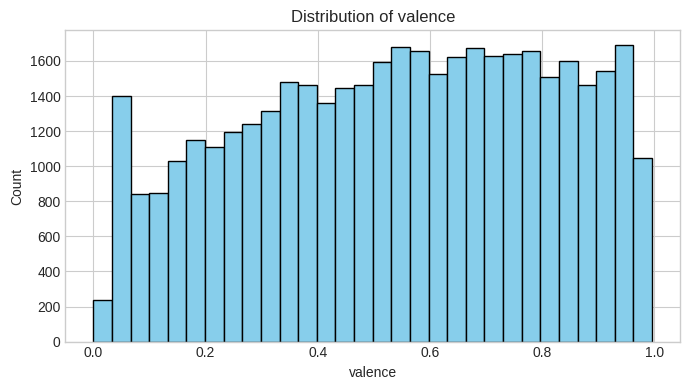

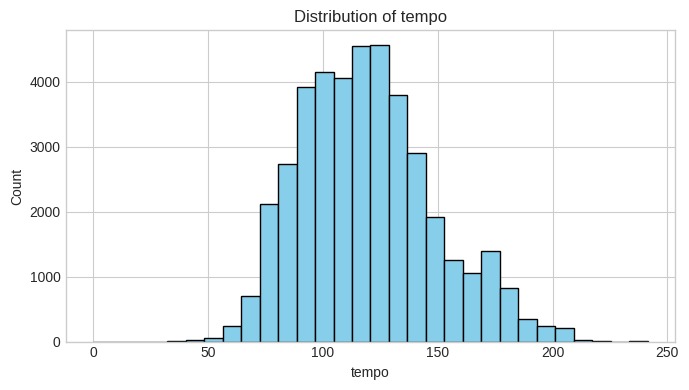

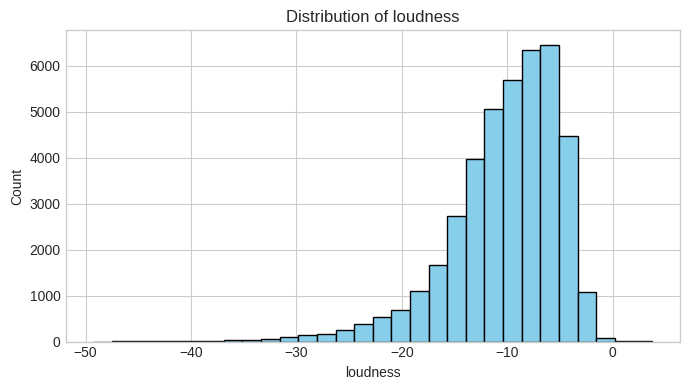

In [6]:
for col in features:
    plt.figure(figsize=(7,4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"reports/figures/{col}_hist.png", dpi=150)
    plt.show()


In [7]:
insights = []

for f in features:
    first = decade_means.loc[1960, f]
    last = decade_means.iloc[-1][f]
    direction = "increased" if last > first else "decreased"
    insights.append(f"- {f.capitalize()} has {direction} from the 1960s ({first:.2f}) to the 2010s ({last:.2f}).")

with open("reports/figures/quick_insights.txt", "w") as f:
    f.write("\n".join(insights))

print("✅ Insights saved in reports/figures/quick_insights.txt")
for line in insights:
    print(line)


✅ Insights saved in reports/figures/quick_insights.txt
- Danceability has increased from the 1960s (0.49) to the 2010s (0.57).
- Energy has increased from the 1960s (0.45) to the 2010s (0.67).
- Valence has decreased from the 1960s (0.57) to the 2010s (0.44).
- Tempo has increased from the 1960s (115.12) to the 2010s (122.35).
- Loudness has increased from the 1960s (-12.03) to the 2010s (-7.59).
